*A modelagem de tópicos* é uma técnica de aprendizado de máquina não supervisionado usada para descobrir tópicos ocultos em um conjunto de dados de texto. Ela analisa a frequência de palavras em um corpus de documentos e agrupa palavras com significado semelhante em tópicos.

A modelagem de tópicos assume que cada documento é uma mistura de tópicos e que cada tópico é uma distribuição de palavras. O objetivo é encontrar a mistura de tópicos que melhor explica o conjunto de documentos.

O LDA (Latent Dirichlet Allocation), é um modelo probabilístico de tópicos que é amplamente utilizado para analisar conjuntos de dados de texto.

O LDA assume que cada documento é uma mistura de tópicos, e cada tópico é uma distribuição de palavras. O modelo tenta encontrar a melhor mistura de tópicos para cada documento e a melhor distribuição de palavras para cada tópico.

1. IMPORTAÇÃO DE BIBLIOTECAS

In [1]:
# manipulação de dataframes
import re 
import unicodedata  
import pandas as pd
from pprint import pprint 

# Library Natural Language Toolkit - NLTK
import nltk 
nltk.download('punkt')  
nltk.download('wordnet') 

# remoção de palavras
from nltk.corpus import stopwords 
stopwords = nltk.corpus.stopwords.words('portuguese')

# normalizar textos - corrige abreviações, gírias, erros ortográficos, dentre outras funcionalidades
from enelvo.normaliser import Normaliser

# lematização
import spacy
spacy.cli.download("pt_core_news_sm")

# LDA
import gensim 
from gensim import corpora
import gensim.corpora as corpora 
from gensim.models import CoherenceModel 
from gensim.utils import simple_preprocess 
 
# gráficos/imagens
import pyLDAvis
import seaborn as sns 
import pyLDAvis.gensim
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors 
from wordcloud import WordCloud, STOPWORDS 

%matplotlib inline 

import logging 
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)  

import warnings 
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package punkt to /Users/pesati/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/pesati/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 25.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/Users/pesati/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backends is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/pesati/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


In [2]:
# Mostrar o texto completo no dataframe

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

2. WEBSCRAPING DOS DADOS

#####  * Após realização do webscraping no site, foi gerado um arquivo xlsx com os dados nas suas respectivas colunas.

In [3]:
path = '/Users/pesati/Desktop/Projeto TCC/webscraping/all_complaints.xlsx'

dataframe = pd.read_excel(path)
dataframe.head()

location                 date             id  \
0  São Pedro da Aldeia - RJ  01/05/2024 às 13:25  ID: 187882723   
1              Caucaia - CE  01/05/2024 às 11:42  ID: 187876863   
2          Nova Olinda - CE  01/05/2024 às 11:09  ID: 187874849   
3            Itapipoca - CE  01/05/2024 às 10:26  ID: 187872479   
4               Maceió - AL  01/05/2024 às 10:17  ID: 187871927   

                      category                  product             problem  \
0  Concessionárias de Serviços                      Luz  Demora na execução   
1  Concessionárias de Serviços                      Luz  Demora na execução   
2   Não encontrei meu problema                      NaN   Cobrança indevida   
3                          NaN                      Luz  Demora na execução   
4                          NaN  Pagamentos e Documentos  Demora na execução   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   complaint  \
0          Na madrugada de sexta para sábado uma árvore caiu em cima da fiação elétrica, causando fogo e explosão na rede. Deixando moradores sem energia elétrica, uma equipe somente apareceu no domingo, tirou fotos e foram embora alegando não ter equipamento. Na segunda outra equipe veio e somente cortou o tronco da árvore, e foram embora também alegando não ter equipamentos. Desde então não mais retornaram. Estamos sem energia elétrica desde sábado, hoje é quarta e não veio mais nenhuma equipe restabelecer a energia.   
1                                                                                                                                                 Já faz mais mais de 72 horas praticamente sem energia pq nada funciona pois e energia fraca desde segunda feira 7 horas da manhã sem energia e hoje já e quarta feira e nada de resolverem já liguei tantas vezes que nem conto mais um total descaso não vou mais me estressar com isso a partir de amanhã irei atrás dos meus direitos vc paga um absurdo por um serviço que não presta.   
2                                                                                                                                                 Ja procurei no app enel pra tirar essa conta de fatura por imail e nao acho por favor quero receber em maos o minha conta todos os meses na minha recidrncia msm e um debito qur esta no serasa no meu nome que nem devoo nao vou paga algo qur nao devo assim me complica neh botando meu nome no serasa por uma conta qur nao devoo e por favor que ajeitem essas duas questoens logo ..   
3  Entrei em contato com a Enel,pela primeira vez fiz a solicitação de primeira ligação,eles deram o prazo de 5 dias úteis,mais eles não apareceram, entrei em contato novamente,mim deram mais 5 dias úteis,sendo que já tinha mim dado 5 dias , deram mais 5 novamente, resumindo estou a quase 15 dias no escuro,com minha esposa,meu filho de 8 anos que é neuro divergente, estamos passando uma barra no escuro sem energia elétrica,ainda sem nenhum resposta, queria pelo amor de deus que alguém ou algum órgão pudesse mim ajudar.   
4                    Precisei fazer uma consulta no serasa e vi que estava com uma dívida de pouco mais de 18 reais que não lembro de que foi (acredito que foi cobrança [Editado pelo Reclame Aqui]). Paguei essa dívida pelo site do governo federal no programa desenrola. Esperei os cinco dias úteis e simplesmente a Enel não retirou meu nome do Serasa. Isso é um absurdo! Uma empresa que faz uma cobrança de nem sei o que e ainda não retira o nome da inadimplência mesmo depois de pago. Empresa irrespo

3. PRÉ PROCESSAMENTO DOS DADOS

#####  * Esta etapa é crucial para garantir que os dados estejam preparados para a modelagem e que o algoritmo possa funcionar de forma eficiente e precisa.

<ol>
<li>Remover pontuação (caracteres especiais)</li>
<li>Transformar todas as palavras em letras minúsculas</li>
<li>Remover as stopwords - são palavras que carregam pouca relevância semântica.</li>
<li>Tratamento de abreviações e gírias</li>
<li>Tokenização - pegar cada uma das palavras do texto (tokens) e armazená-las em uma lista</li>
<li>Stemização - reduzir as palavras flexionadas à sua raiz</li>
<li>Lematização - representar as palavras através do infinitivo para os verbos, e do masculino singular no caso de substantivos e adjetivos.</li>
</ol>

In [16]:
# Convertendo para lista

complaints = dataframe.complaint.values.tolist()

In [17]:
# Removendo caracteres especiais e números

complaints = [re.sub(r'[^\w\s0-9]', ' ', re.sub('[0-9]', '', word)) if isinstance(word, str) else word for word in complaints]

In [18]:
# Converter tudo para string e depois transforma tudo para minúsculo

complaints = [str(complaint).lower() for complaint in complaints]

In [12]:
# O Normaliser corrige abreviações (por exemplo: vc, gnt, oq, pq, etc.) e erros ortográficos.
# sanitize - remove pontuações e emojis

normalizador = Normaliser(tokenizer='readable', sanitize=True)
complaints = [normalizador.normalise(word) for word in complaints]

In [ ]:
# O processo do normalizador é demorado
# Realizado a transformação para um dataframe e exportado para excel e ser utilizado posteriormente

complaints_df = pd.DataFrame(complaints)
complaints_df.to_excel('/Users/pesati/Desktop/enelvo_normalise.xlsx', index=False)

In [20]:
path_normalize = '/Users/pesati/Desktop/enelvo_normalise.xlsx'

dataframe_normalise = pd.read_excel(path_normalize)
dataframe_normalise.head()

complaint
0  na madrugada de sexta para sábado uma árvore caiu em cima da fiação elétrica causando fogo e explosão na rede deixando moradores sem energia elétrica uma equipe somente apareceu no domingo tirou fotos e foram embora alegando não ter equipamento na segunda outra equipe veio e somente cortou o tronco da árvore e foram embora também alegando não ter equipamentos desde então não mais retornaram estamos sem energia elétrica desde sábado hoje é quarta e não veio mais nenhuma equipe restabelecer a energia
1                                                                                                                               já faz mais mais de horas praticamente sem energia porque nada funciona pois e energia fraca desde segunda feira horas da manhã sem energia e hoje já e quarta feira e nada de resolverem já liguei tantas vezes que nem conto mais um total descaso não vou mais me estressar com isso a partir de amanhã irei atrás dos meus direitos você paga um absurdo por um serviço que não presta
2                                                                                                                     já procurei no appplication anel pra tirar essa conta de fatura por underline e não acho por favor quero receber em mãos o minha conta todos os meses na minha residência mesmo e um debito que esta no serasa no meu nome que nem devoo não vou paga algo que não devo assim me complica né botando meu nome no serasa por uma conta que não devoo e por favor que ajeitem essas duas questões logo
3    entrei em contato com a anel pela primeira vez fiz a solicitação de primeira ligação eles deram o prazo de dias úteis mais eles não apareceram entrei em contato novamente mim deram mais dias úteis sendo que já tinha mim dado dias deram mais novamente resumindo estou a quase dias no escuro com minha esposa meu filho de anos que é neuro divergente estamos passando uma barra no escuro sem energia elétrica ainda sem nenhum resposta queria pelo amor de deus que alguém ou algum órgão pudesse mim ajudar
4               precisei fazer uma consulta no serasa e vi que estava com uma dívida de pouco mais de reais que não lembro de que foi acredito que foi cobrança editado pelo reclame aqui paguei essa dívida pelo site do governo federal no programa desenrola esperei os cinco dias úteis e simplesmente a anel não retirou meu nome do serasa isso é um absurdo uma empresa que faz uma cobrança de nem sei o que e ainda não retira o nome da inadimplência mesmo depois de pago empresa irresponsável e desorganizada

In [21]:
complaints = dataframe_normalise.complaint.values.tolist()

In [22]:
# Remover os caracteres Non ASCII (acentuações)

complaints = [unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in complaints]

In [50]:
# Adicionando novas stopwords em português

new_stopwords = ['ai', 'ainda', 'agora', 'anel', 'ate', 'aqui', 'de', 'dia', 'entao', 'esse', 'ficar', 'gente', 
                 'ir', 'ja', 'la', 'nao', 'ne', 'ninguem', 'pra', 'pois', 'porque', 'ser', 'sempre', 
                 'sobre', 'so', 'ta', 'tambem', 'ter', 'tudo', 'vai', 'vc', 'voce', 'vez', 'vir', 'viu']

stopwords.extend(new_stopwords)

In [24]:
# Remover as stopwords

complaints = [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in complaints]
complaints = [" ".join(word) for word in complaints]

In [25]:
complaints

['madrugada sexta sabado arvore caiu cima fiacao eletrica causando fogo explosao rede deixando moradores energia eletrica equipe somente apareceu domingo tirou fotos embora alegando equipamento segunda outra equipe veio somente cortou tronco arvore embora alegando equipamentos desde retornaram energia eletrica desde sabado hoje quarta veio nenhuma equipe restabelecer energia',
 'faz horas praticamente energia nada funciona energia fraca desde segunda feira horas manha energia hoje quarta feira nada resolverem liguei tantas vezes conto total descaso vou estressar partir amanha irei atras direitos paga absurdo servico presta',
 'procurei appplication tirar conta fatura underline acho favor quero receber maos conta todos meses residencia debito serasa nome devoo vou paga algo devo assim complica botando nome serasa conta devoo favor ajeitem duas questoes logo',
 'entrei contato primeira vez fiz solicitacao primeira ligacao deram prazo dias uteis apareceram entrei contato novamente mim der

In [26]:
# realizar a lematização

nlp = spacy.load('pt_core_news_sm')
lemmas_complaints = [[token.lemma_ for token in nlp(complaint)] for complaint in complaints]
lemmas_complaints = [[word for word in sublist if word not in stopwords] for sublist in lemmas_complaints]
lemmas_complaints = [" ".join(word) for word in lemmas_complaints]

In [27]:
print(lemmas_complaints)

['madrugar sexta sabar arvore cair cima fiacao eletrico causar fogo explosao rede deixar morador energia eletrico equipe somente aparecer domingo tirar foto embora alegar equipamento segundo outro equipe somente cortar tronco arvore embora alegar equipamento desde retornar energia eletrico desde sabar hoje quarto nenhum equipe restabelecer energia', 'fazer hora praticamente energia nada funcionar energia fraco desde segundo feira hora mar energia hoje quarto feira nada resolver liguei tanto vez conto total descaso estressar partir amanha irar atra direito pagar absurdo servico prestar', 'procur appplication tirar conto fatura underline achar favor querer receber mao contar todo mês residenciar debito serasa nome devoo vou pagar algo devor assim complico botar nome serasa contar devoo favor ajeitar dois questoe logo', 'entrar contato primeira vez fiz solicitacao primeiro ligacao dar prazo utel aparecer entrar contato novamente dar utel dar dar novamente resumir quase escuro esposo filho

In [ ]:
'''
lemm = [[token.lemma_ for token in nlp(complaint)] for complaint in complaints]
allowed_postags = ['NOUN', 'ADJ', 'VERB', 'ADV']
texts_out = [[token.lemma_ for token in nlp(" ".join(sent)) if token.pos_ in allowed_postags] for sent in lemm]
texts_out
'''


In [28]:
# Comparando as reclamações com o pré-processamento delas
df_lemmas_complaints = pd.DataFrame(lemmas_complaints, columns=['preprocessing complaints'])
df_complaints = pd.concat([dataframe['complaint'], df_lemmas_complaints], axis=1)

In [29]:
df_complaints.head()

complaint  \
0          Na madrugada de sexta para sábado uma árvore caiu em cima da fiação elétrica, causando fogo e explosão na rede. Deixando moradores sem energia elétrica, uma equipe somente apareceu no domingo, tirou fotos e foram embora alegando não ter equipamento. Na segunda outra equipe veio e somente cortou o tronco da árvore, e foram embora também alegando não ter equipamentos. Desde então não mais retornaram. Estamos sem energia elétrica desde sábado, hoje é quarta e não veio mais nenhuma equipe restabelecer a energia.   
1                                                                                                                                                 Já faz mais mais de 72 horas praticamente sem energia pq nada funciona pois e energia fraca desde segunda feira 7 horas da manhã sem energia e hoje já e quarta feira e nada de resolverem já liguei tantas vezes que nem conto mais um total descaso não vou mais me estressar com isso a partir de amanhã irei atrás dos meus direitos vc paga um absurdo por um serviço que não presta.   
2                                                                                                                                                 Ja procurei no app enel pra tirar essa conta de fatura por imail e nao acho por favor quero receber em maos o minha conta todos os meses na minha recidrncia msm e um debito qur esta no serasa no meu nome que nem devoo nao vou paga algo qur nao devo assim me complica neh botando meu nome no serasa por uma conta qur nao devoo e por favor que ajeitem essas duas questoens logo ..   
3  Entrei em contato com a Enel,pela primeira vez fiz a solicitação de primeira ligação,eles deram o prazo de 5 dias úteis,mais eles não apareceram, entrei em contato novamente,mim deram mais 5 dias úteis,sendo que já tinha mim dado 5 dias , deram mais 5 novamente, resumindo estou a quase 15 dias no escuro,com minha esposa,meu filho de 8 anos que é neuro divergente, estamos passando uma barra no escuro sem energia elétrica,ainda sem nenhum resposta, queria pelo amor de deus que alguém ou algum órgão pudesse mim ajudar.   
4                    Precisei fazer uma consulta no serasa e vi que estava com uma dívida de pouco mais de 18 reais que não lembro de que foi (acredito que foi cobrança [Editado pelo Reclame Aqui]). Paguei essa dívida pelo site do governo federal no programa desenrola. Esperei os cinco dias úteis e simplesmente a Enel não retirou meu nome do Serasa. Isso é um absurdo! Uma empresa que faz uma cobrança de nem sei o que e ainda não retira o nome da inadimplência mesmo depois de pago. Empresa irresponsável e desorganizada.   

                                                                                                                                                                                                                                                                                                                                      preprocessing complaints  
0  madrugar sexta sabar arvore cair cima fiacao eletrico causar fogo explosao rede deixar morador energia eletrico equipe somente aparecer domingo tirar foto embora alegar equipamento segundo outro equipe somente cortar tronco arvore embora alegar equipamento desde retornar energia eletrico desde sabar hoje quarto nenhum equipe restabelecer energia  
1                                                                                                               fazer hora praticamente energia nada funcionar energia fraco desde segundo feira hora mar energia hoje quarto feira nada resolver liguei tanto vez conto total descaso estressar partir amanha irar atra direito pagar absurdo servico prestar  
2                                                                                                                      procur appplication tirar conto fatura underline achar favor querer receber mao contar todo mês residenciar debito serasa nome devoo vou pagar algo devor assim complico

4. TRANSFORMAÇÃO DE DADOS: CORPUS E DICIONÁRIO

##### O LDA exige os dados em um determinado formato. Necessita do corpus como um dicionário de mapeamento, onde cada palavra possui um ID numérico único. Também precisa do corpus como uma matriz de frequência termo-documento que contém a frequência de cada palavra em cada documento.

In [30]:
# juntar em uma única lista

lemmas_complaints = [[token.lemma_ for token in nlp(complaint)] for complaint in complaints]
lemmas_complaints = [item for sublist in lemmas_complaints for item in sublist]
print(lemmas_complaints)

['madrugar', 'sexta', 'sabar', 'arvore', 'cair', 'cima', 'fiacao', 'eletrico', 'causar', 'fogo', 'explosao', 'rede', 'deixar', 'morador', 'energia', 'eletrico', 'equipe', 'somente', 'aparecer', 'domingo', 'tirar', 'foto', 'embora', 'alegar', 'equipamento', 'segundo', 'outro', 'equipe', 'vir', 'somente', 'cortar', 'tronco', 'arvore', 'embora', 'alegar', 'equipamento', 'desde', 'retornar', 'energia', 'eletrico', 'desde', 'sabar', 'hoje', 'quarto', 'vir', 'nenhum', 'equipe', 'restabelecer', 'energia', 'fazer', 'hora', 'praticamente', 'energia', 'nada', 'funcionar', 'energia', 'fraco', 'desde', 'segundo', 'feira', 'hora', 'mar', 'energia', 'hoje', 'quarto', 'feira', 'nada', 'resolver', 'liguei', 'tanto', 'vez', 'conto', 'total', 'descaso', 'ir', 'estressar', 'partir', 'amanha', 'irar', 'atra', 'direito', 'pagar', 'absurdo', 'servico', 'prestar', 'procur', 'appplication', 'tirar', 'conto', 'fatura', 'underline', 'achar', 'favor', 'querer', 'receber', 'mao', 'contar', 'todo', 'mês', 'residen

In [ ]:
# v2
#lemmas_complaints = [[token.lemma_ for token in nlp(complaint)] for complaint in lemmas_complaints]
#lemmas_complaints = [item for sublist in lemmas_complaints for item in sublist]
#print(lemmas_complaints)

In [31]:
# doc2bow espera receber uma lista de tokens (strings) para cada documento
# Passar uma lista com a única lista de tokens
# doc2bow é uma função do Gensim que transforma um documento de texto em uma representação de vetor de bolsa de palavras (Bag-of-Words, BoW)
 
id2word = corpora.Dictionary([lemmas_complaints])  
corpus = [id2word.doc2bow(lemmas_complaints)] 
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 8), (4, 1), (5, 4), (6, 1), (7, 1), (8, 1), (9, 9), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 3), (16, 1), (17, 6), (18, 4), (19, 1), (20, 11), (21, 1), (22, 13), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 4), (32, 1), (33, 4), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 8), (40, 17), (41, 1), (42, 1), (43, 7), (44, 1), (45, 9), (46, 1), (47, 3), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 10), (58, 8), (59, 1), (60, 1), (61, 1), (62, 111), (63, 3), (64, 2), (65, 15), (66, 1), (67, 1), (68, 4), (69, 1), (70, 1), (71, 1), (72, 2), (73, 3), (74, 2), (75, 1), (76, 14), (77, 6), (78, 1), (79, 2), (80, 18), (81, 1), (82, 1), (83, 2), (84, 3), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 2), (91, 1), (92, 1), (93, 2), (94, 2), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 4), (101, 1), (102, 1), (103, 3), (104, 10), (105, 1), (106, 1), (107, 1), (108, 3), (109, 3),

In [32]:
# mostrando as palavras e suas frequências

id_frequency = [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
print(id_frequency)

[[('Abonda', 1), ('Abrupta', 1), ('Acabe', 1), ('Acionei', 8), ('Aciono', 1), ('Acordei', 4), ('Adiantei', 1), ('Afirmei', 1), ('Afonso', 1), ('Agendamento', 9), ('Aguarde', 1), ('Alberto', 1), ('Alex', 1), ('Alexandre', 2), ('Allan', 1), ('Almeida', 3), ('Aluminio', 1), ('Alves', 6), ('Am', 4), ('Amazon', 1), ('Amin', 11), ('Andrade', 1), ('Antonio', 13), ('Aparecia', 1), ('Aparelho', 1), ('Apple', 2), ('Apurei', 1), ('Araripe', 1), ('Arbitraria', 1), ('Area', 1), ('Asco', 1), ('Aspa', 4), ('Assembleia', 1), ('Assinei', 4), ('Assis', 1), ('Atendentes', 2), ('Atendi', 1), ('Atendimento', 1), ('Atrasei', 1), ('Atraves', 8), ('Autorizei', 17), ('Auxilio', 1), ('Aviao', 1), ('Bairro', 7), ('Bambina', 1), ('Banco', 9), ('Bari', 1), ('Beira', 3), ('Belo', 2), ('Benfica', 1), ('Benjamin', 1), ('Bento', 1), ('Berg', 1), ('Bernardo', 1), ('Bezerra', 1), ('Bitola', 1), ('Bivolt', 1), ('Bob', 10), ('Bolsa', 8), ('Bonus', 1), ('Botao', 1), ('Braga', 1), ('Brasil', 111), ('Cabo', 3), ('Cafu', 2), 

In [ ]:
# v2
#list_lemmas_complaints = [[token.lemma_ for token in nlp(complaint)] for complaint in complaints]
#list_lemmas_complaints = [[word for word in sublist if word not in stopwords] for sublist in list_lemmas_complaints]
#print(list_lemmas_complaints)

In [33]:
lists = [[token.lemma_ for token in nlp(complaint)] for complaint in complaints]
print(lists)

[['madrugar', 'sexta', 'sabar', 'arvore', 'cair', 'cima', 'fiacao', 'eletrico', 'causar', 'fogo', 'explosao', 'rede', 'deixar', 'morador', 'energia', 'eletrico', 'equipe', 'somente', 'aparecer', 'domingo', 'tirar', 'foto', 'embora', 'alegar', 'equipamento', 'segundo', 'outro', 'equipe', 'vir', 'somente', 'cortar', 'tronco', 'arvore', 'embora', 'alegar', 'equipamento', 'desde', 'retornar', 'energia', 'eletrico', 'desde', 'sabar', 'hoje', 'quarto', 'vir', 'nenhum', 'equipe', 'restabelecer', 'energia'], ['fazer', 'hora', 'praticamente', 'energia', 'nada', 'funcionar', 'energia', 'fraco', 'desde', 'segundo', 'feira', 'hora', 'mar', 'energia', 'hoje', 'quarto', 'feira', 'nada', 'resolver', 'liguei', 'tanto', 'vez', 'conto', 'total', 'descaso', 'ir', 'estressar', 'partir', 'amanha', 'irar', 'atra', 'direito', 'pagar', 'absurdo', 'servico', 'prestar'], ['procur', 'appplication', 'tirar', 'conto', 'fatura', 'underline', 'achar', 'favor', 'querer', 'receber', 'mao', 'contar', 'todo', 'mês', 're

5. MODELAGEM DE BIGRAMAS E TRIGRAMAS

In [34]:
# Criando modelos de bigramas e trigramas
# min_count: este parâmetro define a frequência mínima de um bigrama para ser considerado
# threshold: este parâmetro controla a "força" da associação entre duas palavras para formar um bigrama

bigram = gensim.models.Phrases(lists, min_count=2, threshold=20)
trigram = gensim.models.Phrases(bigram[lists], threshold=10)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [35]:
print(trigram_mod[bigram_mod[lists[0]]])

['madrugar', 'sexta', 'sabar', 'arvore', 'cair_cima', 'fiacao', 'eletrico', 'causar', 'fogo', 'explosao', 'rede', 'deixar', 'morador', 'energia_eletrico', 'equipe', 'somente', 'aparecer', 'domingo', 'tirar_foto', 'embora', 'alegar', 'equipamento', 'segundo', 'outro', 'equipe_vir', 'somente', 'cortar', 'tronco', 'arvore', 'embora', 'alegar', 'equipamento', 'desde', 'retornar', 'energia_eletrico', 'desde_sabar', 'hoje', 'quarto', 'vir', 'nenhum', 'equipe', 'restabelecer', 'energia']


In [36]:
def make_bigrams(lists):
     return [bigram_mod[doc] for doc in lists]

def make_trigrams(lists):
     return [trigram_mod[bigram_mod[doc]] for doc in lists]  

bigrams = make_bigrams(lists)
trigrams = make_trigrams(lists)

6. APLICAÇÃO DO MODELO LDA

##### * A perplexidade é uma medida de quão bem o modelo LDA se ajusta aos dados. Basicamente, ela mede a capacidade do modelo de prever novos documentos. Uma perplexidade baixa indica que o modelo se ajusta bem aos dados e é capaz de prever novos documentos com maior precisão. Uma perplexidade alta sugere que o modelo não está se ajustando bem aos dados. </br>

##### * A coerência é uma medida da interpretabilidade e inteligibilidade dos tópicos gerados pelo modelo LDA. Ela avalia se as palavras dentro de um tópico são semanticamente relacionadas e se o tópico como um todo faz sentido. Uma pontuação de coerência alta indica que os tópicos são bem definidos e compreensíveis. Uma pontuação baixa pode indicar que os tópicos são confusos ou que as palavras dentro de um tópico não estão relacionadas semanticamente.

 - Entendendo os parâmetros do modelo:

<ol>
<li> corpus: Este é o conjunto de documentos que serão usados para treinar o modelo LDA. Você deve fornecer um corpus de documentos pré-processados na forma de uma lista de listas de inteiros, onde cada inteiro representa o índice de um termo no vocabulário.</li>
<li>id2word: Este é um dicionário que mapeia índices de palavras para palavras reais. Isso é usado para recuperar as palavras correspondentes aos tópicos gerados pelo modelo.</li>
<li>num_topics: Este é o número de tópicos que você deseja que o modelo descubra nos dados.</li>
<li>random_state: Este parâmetro define a semente aleatória para o modelo LDA. Ao definir uma semente, você garante que os resultados do modelo sejam repetíveis.</li>
<li>update_every: Este parâmetro controla a frequência com que o modelo é atualizado durante o treinamento. Um valor de 1 significa que o modelo é atualizado após o processamento de cada documento.</li>
<li>chunksize: Este parâmetro define o tamanho do bloco de documentos que será usado para atualizar o modelo. Um tamanho de bloco maior pode ser mais eficiente para grandes conjuntos de dados.</li>
<li>passes: Este parâmetro define quantas vezes o modelo será treinado sobre o corpus inteiro. Um número maior de passes pode levar a resultados mais precisos, mas também pode levar mais tempo para o treinamento.</li>
<li>alpha: Este parâmetro controla a concentração de tópicos. Ele define o parâmetro de Dirichlet para a distribuição de tópicos de cada documento. 'auto' significa que a biblioteca Gensim tentará encontrar automaticamente o melhor valor para alpha.</li>
<li>per_word_topics: Este parâmetro indica se você deseja obter a distribuição de tópicos para cada palavra no corpus. Se for True, o modelo também fornecerá a probabilidade de cada palavra pertencer a cada tópico.</li>
</ol>

In [37]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                            id2word = id2word,
                                            num_topics = 10,
                                            random_state = 60,
                                            update_every = 1,
                                            chunksize = 100,
                                            passes = 2,
                                            alpha = 'auto',
                                            per_word_topics = True)

In [38]:
pprint(lda_model.print_topics()) 

[(0,
  '0.011*"energia" + 0.009*"fazer" + 0.008*"vir" + 0.007*"hoje" + '
  '0.006*"empresa" + 0.006*"problema" + 0.005*"pagar" + 0.005*"casa" + '
  '0.005*"conta" + 0.005*"todo"'),
 (1,
  '0.019*"energia" + 0.011*"fazer" + 0.008*"empresa" + 0.008*"valor" + '
  '0.007*"vir" + 0.007*"hoje" + 0.007*"problema" + 0.007*"casa" + 0.007*"todo" '
  '+ 0.007*"resolver"'),
 (2,
  '0.020*"energia" + 0.013*"fazer" + 0.008*"hoje" + 0.008*"pagar" + '
  '0.008*"empresa" + 0.008*"informar" + 0.007*"contar" + 0.007*"casa" + '
  '0.007*"todo" + 0.007*"problema"'),
 (3,
  '0.014*"energia" + 0.008*"empresa" + 0.007*"fazer" + 0.007*"pagar" + '
  '0.007*"valor" + 0.006*"vir" + 0.006*"hoje" + 0.005*"resolver" + '
  '0.005*"casa" + 0.005*"outro"'),
 (4,
  '0.018*"energia" + 0.010*"fazer" + 0.009*"resolver" + 0.008*"pagar" + '
  '0.007*"todo" + 0.007*"valor" + 0.007*"problema" + 0.006*"empresa" + '
  '0.006*"poder" + 0.006*"hoje"'),
 (5,
  '0.018*"energia" + 0.012*"fazer" + 0.009*"pagar" + 0.009*"empresa" + '
 

In [39]:
# Calculando a perplexidade e o score de coerência para avaliar a qualidade de um modelo LDA

print('\nPerplexity: ', lda_model.log_perplexity(corpus))

coherence_model_lda = CoherenceModel(model=lda_model, texts = bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence() 
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.445455735716149

Coherence Score:  0.3523909478045329


7. Descobrir a quantidade de tópicos a ser utilizada no LDA

    O LDA irá analisar seu corpus de textos e tentar identificar 10 temas recorrentes que melhor explicam a estrutura temática dos documentos. Cada tópico será representado por uma distribuição de probabilidade sobre as palavras do seu vocabulário, onde as palavras mais prováveis de aparecerem nesse tópico terão pesos maiores.

    A escolha do número de tópicos é crucial para a qualidade do modelo:

    * Número muito baixo: O modelo pode ser muito genérico e não capturar nuances importantes nos seus dados. </br>
    * Número muito alto: O modelo pode ser muito específico e criar tópicos irrelevantes ou sobrepostos.


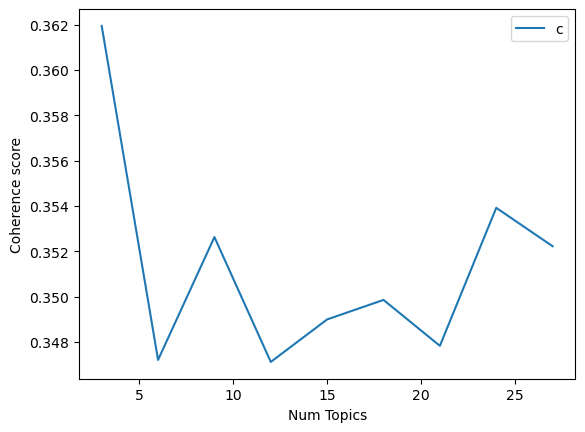

In [40]:
# determinar a melhor quantidade de tópicos para a modelagem

def compute_coherence_values(dictionary, corpus, texts, limit, start = 3, step = 3):
   
    coherence_values = []
    model_list = [] 
    
    for num_topics in range(start, limit, step): 
        model = gensim.models.ldamodel.LdaModel(corpus = corpus, num_topics = num_topics, id2word = id2word)
        model_list.append(model)         
        coherencemodel = CoherenceModel(model = model, texts = texts, dictionary = dictionary, coherence = 'c_v') 
        coherence_values.append(coherencemodel.get_coherence())            
    
    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary = id2word, corpus = corpus, texts = bigrams, start = 3, limit = 30, step = 3)

limit = 30; start = 3; step = 3; 

x = range(start, limit, step) 

plt.plot(x, coherence_values) 
plt.xlabel("Num Topics") 
plt.ylabel("Coherence score") 
plt.legend(("coherence_values"), loc='best') 
plt.show()

In [41]:
# lista dos valores de coerência, para melhor identificar o ponto de inflexão do gráfico

for m, cv in zip(x, coherence_values):
     print("A quantidade de tópicos =", m, " tem um valor de coerência de ", round(cv, 4))

A quantidade de tópicos = 3  tem um valor de coerência de  0.3619
A quantidade de tópicos = 6  tem um valor de coerência de  0.3472
A quantidade de tópicos = 9  tem um valor de coerência de  0.3526
A quantidade de tópicos = 12  tem um valor de coerência de  0.3471
A quantidade de tópicos = 15  tem um valor de coerência de  0.349
A quantidade de tópicos = 18  tem um valor de coerência de  0.3499
A quantidade de tópicos = 21  tem um valor de coerência de  0.3478
A quantidade de tópicos = 24  tem um valor de coerência de  0.3539
A quantidade de tópicos = 27  tem um valor de coerência de  0.3522


In [42]:
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.012*"energia" + 0.011*"fazer" + 0.009*"hoje" + 0.008*"empresa" + '
  '0.008*"problema" + 0.007*"vez" + 0.007*"valor" + 0.007*"nada" + '
  '0.007*"resolver" + 0.006*"ser"'),
 (1,
  '0.026*"energia" + 0.012*"fazer" + 0.008*"pagar" + 0.008*"valor" + '
  '0.008*"casa" + 0.007*"vir" + 0.007*"resolver" + 0.007*"empresa" + '
  '0.007*"dia" + 0.006*"contar"'),
 (2,
  '0.013*"energia" + 0.010*"fazer" + 0.008*"empresa" + 0.007*"todo" + '
  '0.007*"pagar" + 0.007*"informar" + 0.006*"hoje" + 0.006*"ir" + '
  '0.006*"contar" + 0.006*"pedir"')]


8. PALAVRAS CHAVE EM CADA DOCUMENTO

In [ ]:
'''
texto_original = dataframe.complaint.values.tolist()

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texto_original):

    sent_topics_df = pd.DataFrame()

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = pd.concat([sent_topics_df, pd.DataFrame({'Dominant_Topic': [int(topic_num)], 'Perc_Contribution': [round(prop_topic,4)], 'Topic_Keywords': [topic_keywords]})], ignore_index=True)
            else:
                break

    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texto_original)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head()

'''

In [155]:
'''
def plot_frequency_wordcloud(df, colname):
    
  df['words'] = df[colname].str.split()

  word_freq = df['words'].explode().value_counts()

  most_common_words = word_freq.head(20)

  wordcloud = WordCloud(width = 500, height = 500, 
                        background_color ='white', 
                        colormap='viridis',
                        stopwords = set(stopwords), 
                        min_font_size = 10,
                        random_state=1).generate_from_frequencies(most_common_words)

  plt.figure(figsize = (5, 5), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()

plot_frequency_wordcloud(df_complaints, 'preprocessing complaints')
'''

In [80]:
'''
def plot_frequency_barchart(df, colname):
  
  df['words'] = df[colname].str.split()

  word_freq = df['words'].explode().value_counts()

  most_common_words = word_freq.head(20)

  plt.figure(figsize=[8,6])

  sns.barplot(x = most_common_words.index, y = most_common_words.values, hue = most_common_words.index, palette = "husl", legend = False)

  plt.xlabel("Palavras")
  plt.ylabel("Frequência")
  plt.title("20 palavras mais frequentes")
  plt.xticks(rotation=90)
  plt.show()

plot_frequency_barchart(df_complaints, 'preprocessing complaints')
'''

9. WORDCLOUD

##### Wordcloud (nuvem de palavras) para visualizar, através de cada tópico, a relevância de cada palavra.

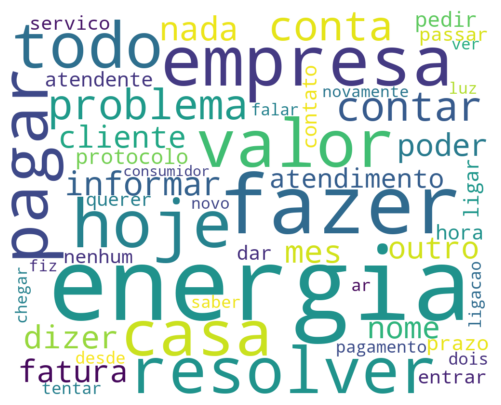

In [61]:
# Wordcloud - com as palavras mais frequentes (max_words)

tokens_wc = [word for word in lemmas_complaints if word not in stopwords]
word_cloud = " ".join(tokens_wc)

wordcloud = WordCloud(background_color="white",
                      width=1000, 
                      height=800,
                      max_words = 50,
                      stopwords = set(stopwords),
                      collocations = False, 
                      colormap='viridis').generate(word_cloud)

fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

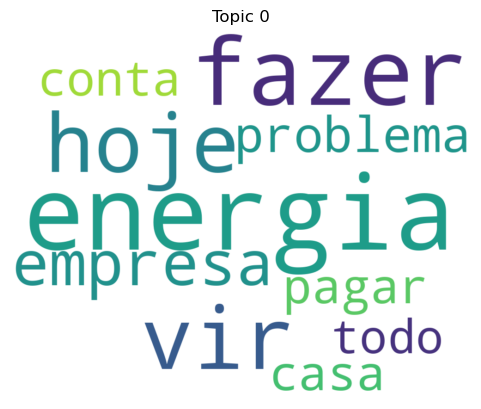

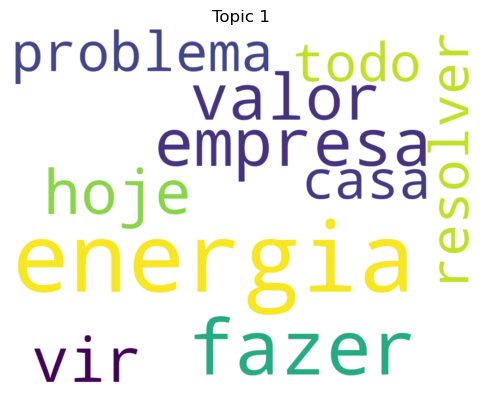

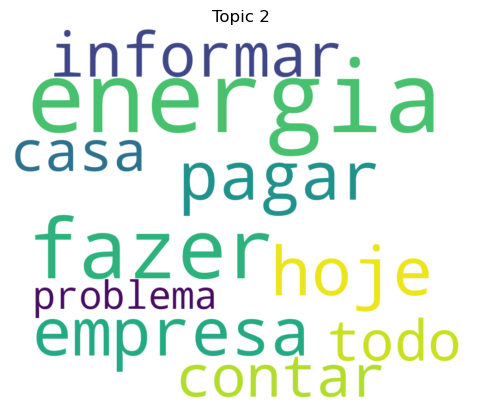

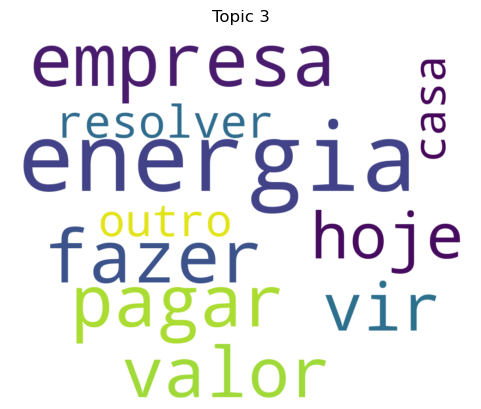

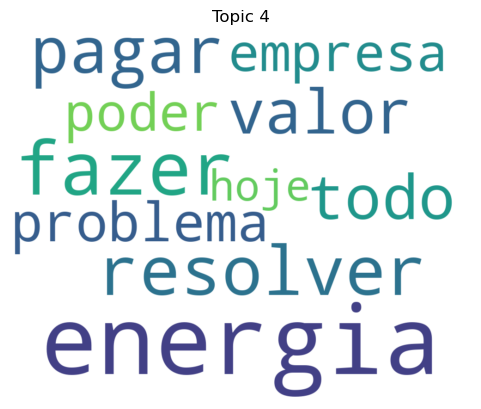

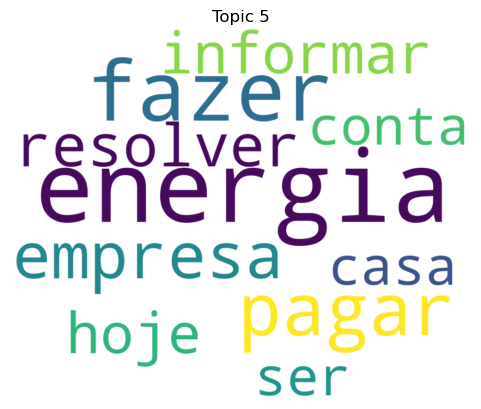

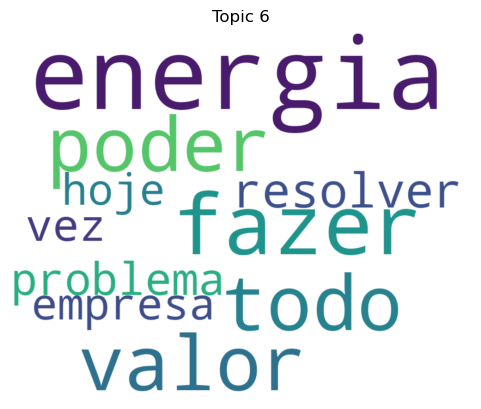

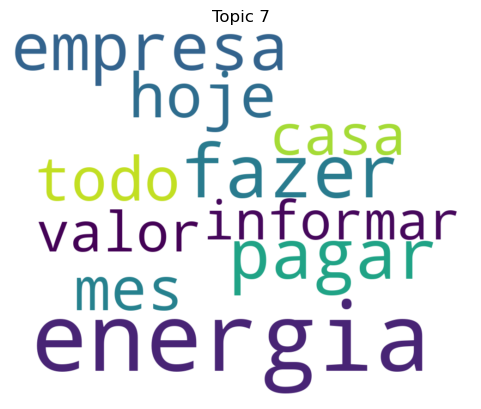

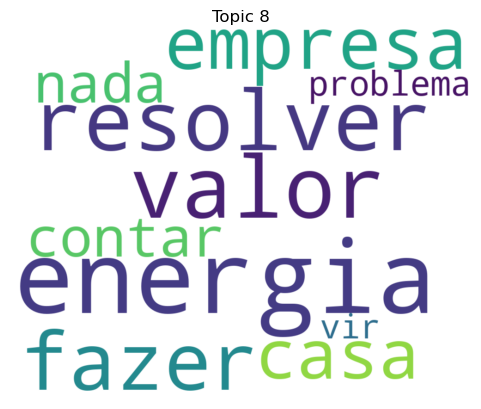

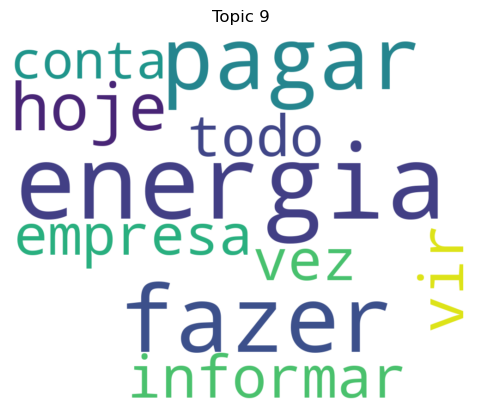

In [82]:
# Wordcloud por tópicos

def create_wordcloud(model, topic):
    
    text = {word: value for word, value in model.show_topic(topic)}
    
    wordcloud = WordCloud(background_color="white",
                          width=1000, 
                          height=800,
                          max_words = 20,
                          stopwords = set(stopwords),
                          collocations = False, 
                          colormap='viridis').generate_from_frequencies(text)
    
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Topic" + " "+ str(topic))
    plt.show()

for i in range(0,10):
    create_wordcloud(lda_model, topic = i)

********

In [63]:
# brigramas e suas pontuações

from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder

tokens = [nltk.tokenize.word_tokenize(doc, language='portuguese') for doc in df_complaints['preprocessing complaints']]

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_documents(tokens)

# Filtrar bigramas que ocorrem menos de 40 vezes
finder.apply_freq_filter(40)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)

print("Bigramas e suas pontuações PMI: \n")
for bigram, score in bigram_scores:
    print(f"{bigram}: {score:.2f}")

Bigramas e suas pontuações PMI: 

('com', 'si'): 10.87
('baixo', 'renda'): 9.26
('editar', 'reclame'): 8.73
('loja', 'fisico'): 8.33
('ar', 'condicionado'): 8.08
('troca', 'titularidade'): 7.79
('trocar', 'titularidade'): 7.70
('bom', 'tarde'): 7.69
('segundo', 'via'): 7.69
('em', 'este'): 7.30
('ordem', 'servico'): 7.30
('de', 'isso'): 7.29
('queda', 'energio'): 7.23
('entrar', 'contato'): 7.18
('falta', 'respeito'): 7.05
('em', 'esse'): 7.02
('de', 'esse'): 6.96
('unidade', 'consumidor'): 6.87
('de', 'este'): 6.84
('data', 'vencimento'): 6.59
('ligueir', 'novamente'): 6.53
('diversos', 'vez'): 6.43
('respeito', 'consumidor'): 6.29
('faltar', 'respeito'): 6.17
('central', 'atendimento'): 6.13
('solucionar', 'problema'): 6.13
('numero', 'cliente'): 6.07
('hoje', 'mar'): 6.05
('desde', 'ontem'): 5.99
('varia', 'vez'): 5.97
('nome', 'sic'): 5.87
('bom', 'noite'): 5.87
('abrir', 'reclamacao'): 5.79
('canal', 'atendimento'): 5.78
('cobranca', 'editar'): 5.70
('nome', 'serasa'): 5.56
('gost

In [64]:
# coluna bigrama
df_complaints['bigrams'] = df_complaints['preprocessing complaints'].apply(lambda x: list(nltk.bigrams(x.split())))

In [68]:
def plot_bigram_wordcloud(df, colname):

  bigrams = df[colname].tolist()
  bigrams = [bigram for sublist in bigrams for bigram in sublist]
  bigrams_string = ' '.join(["_".join(bigram) for bigram in bigrams])

  wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                colormap='viridis',
                min_font_size = 10,
                collocations=False, 
                stopwords = set(stopwords), 
                normalize_plurals=False,
                max_words = 20,
                random_state=1).generate(bigrams_string)

  plt.figure(figsize = (5, 5), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()

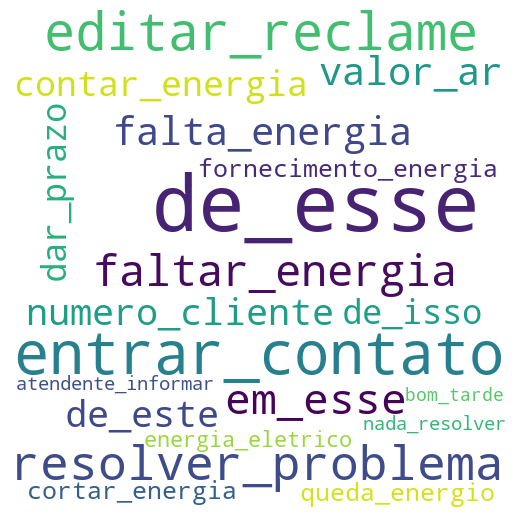

In [75]:
plot_bigram_wordcloud(df_complaints, 'bigrams')

*********

In [76]:
# trigramas e suas pontuações

tokens = [nltk.tokenize.word_tokenize(doc, language='portuguese') for doc in df_complaints['preprocessing complaints']]

trigram_measures = TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_documents(tokens)

# Filtrar bigramas que ocorrem menos de 40 vezes
finder.apply_freq_filter(30)
trigram_scores = finder.score_ngrams(trigram_measures.pmi)

print("Trigrama e suas pontuações PMI: \n")
for trigram, score in trigram_scores:
    print(f"{trigram}: {score:.2f}")

Trigrama e suas pontuações PMI: 

('aler', 'de', 'isso'): 15.41
('venho', 'meio', 'de'): 14.58
('cobranca', 'editar', 'reclame'): 14.44
('meio', 'de', 'este'): 14.16
('liguei', 'varia', 'vez'): 13.14
('fazer', 'troca', 'titularidade'): 13.00
('de', 'esse', 'forma'): 12.36
('de', 'esse', 'empresa'): 10.97


In [77]:
# coluna trigrama
df_complaints['trigrams'] = df_complaints['preprocessing complaints'].apply(lambda x: list(nltk.trigrams(x.split())))

In [78]:
def plot_trigram_wordcloud(df, colname):

  trigrams = df[colname].tolist()
  trigrams = [bigram for sublist in trigrams for bigram in sublist]
  trigrams_string = ' '.join(["_".join(trigram) for trigram in trigrams])

  wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                colormap='viridis',
                min_font_size = 10,
                stopwords = set(stopwords),
                collocations=False, 
                normalize_plurals=False,
                max_words = 15,
                random_state=1).generate(trigrams_string)

  plt.figure(figsize = (5, 5), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()

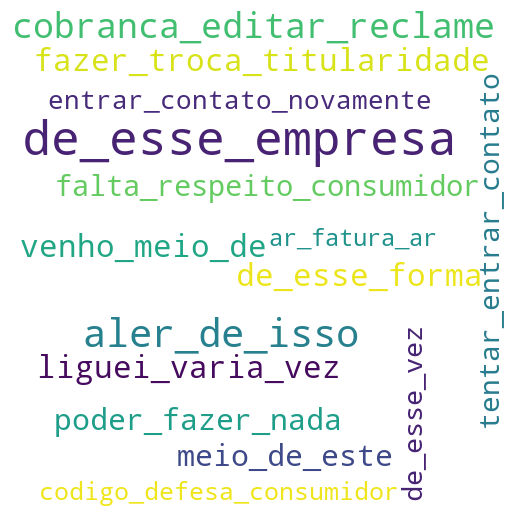

In [79]:
plot_trigram_wordcloud(df_complaints, 'trigrams')

In [80]:
df_complaints.head(2)

complaint  \
0  Na madrugada de sexta para sábado uma árvore caiu em cima da fiação elétrica, causando fogo e explosão na rede. Deixando moradores sem energia elétrica, uma equipe somente apareceu no domingo, tirou fotos e foram embora alegando não ter equipamento. Na segunda outra equipe veio e somente cortou o tronco da árvore, e foram embora também alegando não ter equipamentos. Desde então não mais retornaram. Estamos sem energia elétrica desde sábado, hoje é quarta e não veio mais nenhuma equipe restabelecer a energia.   
1                                                                                                                                         Já faz mais mais de 72 horas praticamente sem energia pq nada funciona pois e energia fraca desde segunda feira 7 horas da manhã sem energia e hoje já e quarta feira e nada de resolverem já liguei tantas vezes que nem conto mais um total descaso não vou mais me estressar com isso a partir de amanhã irei atrás dos meus direitos vc paga um absurdo por um serviço que não presta.   

                                                                                                                                                                                                                                                                                                                                      preprocessing complaints  \
0  madrugar sexta sabar arvore cair cima fiacao eletrico causar fogo explosao rede deixar morador energia eletrico equipe somente aparecer domingo tirar foto embora alegar equipamento segundo outro equipe somente cortar tronco arvore embora alegar equipamento desde retornar energia eletrico desde sabar hoje quarto nenhum equipe restabelecer energia   
1                                                                                                               fazer hora praticamente energia nada funcionar energia fraco desde segundo feira hora mar energia hoje quarto feira nada resolver liguei tanto vez conto total descaso estressar partir amanha irar atra direito pagar absurdo servico prestar   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           bigrams  \
0  [(madrugar, sexta), (sexta, sabar), (sabar, arvore), (arvore, cair), (cair, cima), (cima, fiacao), (fiacao, eletrico), (eletrico, causar), (causar, fogo), (fogo, explosao), (explosao, rede), (rede, deixar), (deixar, morador), (morador, energia), (energia, eletrico), (eletrico, equipe), (equipe, somente), (somente, aparecer), (aparecer, domingo), (domingo, tirar), (tirar, foto), (foto, embora), (embora, alegar), (alegar, equipamento), (equipamento, segundo), (segundo, outro), (outro, equipe), (equipe, somente), (somente, cortar), (cortar, tronco), (tronco, arvore), (arvore, embora), (embora, alegar), (alegar, equipamento), (equipamento, desde), (desde, retornar), (retornar, energia), (energia, eletrico), (eletrico, desde), (desde, sabar), (sabar, hoje), (hoje, quarto), (quarto, nenhum), (nenhum, equipe), (equipe, restabelecer), (restabelecer, energia)]   
1                                                                                                                                              